# Delivery Lead Time Prediction - Improving Customer Service Level

# Introduction

In the field of logistics and supply chain management, calculating the Delivery Lead Time is crucial for ensuring efficient operations and meeting customer expectations. Delivery Lead Time, which refers to the time taken from order placement to delivery, directly impacts inventory planning, customer satisfaction, and operational costs.

Understanding and accurately predicting Delivery Lead Time allows businesses to optimize processes, reduce delays, and build trust with their customers. Moreover, it provides valuable insights for decision-making, such as setting realistic delivery commitments and identifying areas for improvement in the supply chain.

This project aims to analyze and calculate Delivery Lead Time to uncover trends, detect inefficiencies, and enhance overall logistics performance, ultimately contributing to a more reliable and efficient supply chain.

# Project Schedule

## <h2>Exploratory Data Analysis (EDA)</h3>

<h4>1. Data Understanding </h4>

- Load the dataset and perform an initial inspection to understand its structure and contents.

- Identify key features relevant to demand forecasting (e.g., product ID, sales volume, dates, prices, etc.).

- Understand the business context of the dataset (e.g. what each column represents, etc).

<h4>2. Data Cleaning and Preparation</h4>

- Handle missing values.

- Remove or adjust outliers: Identify anomalous values in the dataset and decide whether to remove or adjust them.

- Standardize formats: Ensure consistency in date formats, numerical units, and text entries.

- Feature engineering.

- Aggregate data (e.g., daily to weekly demand).

<h4>3. Pareto Analysis (80/20 Rule)</h4

- Perform a Pareto analysis to classify products by their contribution to total profits.

<h4>4. Exploratory Data Analysis (EDA)</h4>

- Univariate Analysis

- Bivariate Analysis

## <h2>Machine Learning</h3>

<h4>5. Data Preprocessing for Machine Learning</h4>

- Split the dataset into training and testing sets.

- Scale or normalize features if required by the machine learning models.

<h4>6. Model Selection and Training</h4>

- Choosing suitable models for demand forecasting.

    - Regression Models: Linear, Ridge,, Lasso, Decision Tree, KNN, XGBoost.
    
- Training selected models.

<h4>7. Model Evaluation</h4>

- R2 (Coefficient of Determination).

- RMSE (Root Mean Squared Error).

- MSE (Mean Squared Error).
    
- MAE (Mean Absolute Error).
    
<h4>8. Normalizing</h4>

- MinMaxScaler.

# Importing Libraries

In [2]:
# import project libraries
import pandas as pd
pd.set_option("display.max_columns", None)  #Muestra todas las columnas cuando llamas a un DataFrame
import numpy as np
#import math # for math operations 

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
!pip install xgboost
import xgboost as xgb

#Lazy Precit
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Evaluation and Tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## <h1>Exploratory Data Analysis</h1>

## <h1 style="color: #52b45c;">Understanding the Data (First Impression)</h1>

The dataset is composed of customer demand information. There are 53 initial features (columns) and 180.519 entries (rows) 

In [3]:
#Tuve que ponerle parámetro encoding="ISO-8859-1" ya que el archivo tiene un conjunto de caracteres diferente al esperado (UTF-8)

df = pd.read_csv("C:/Users/dalmi/Documents/España/Data Analytics - IronHack/Quests/Quest_6_Mid_Project/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.00,2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.00,2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [5]:
df.shape

(180519, 53)

In [6]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.00,3.50,1.62,0.00,2.00,3.00,5.00,6.00
Days for shipment (scheduled),180519.00,2.93,1.37,0.00,2.00,4.00,4.00,4.00
Benefit per order,180519.00,21.97,104.43,-4274.98,7.00,31.52,64.80,911.80
Sales per customer,180519.00,183.11,120.04,7.49,104.38,163.99,247.40,1939.99
Late_delivery_risk,180519.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Category Id,180519.00,31.85,15.64,2.00,18.00,29.00,45.00,76.00
Customer Id,180519.00,6691.38,4162.92,1.00,3258.50,6457.00,9779.00,20757.00
Customer Zipcode,180516.00,35921.13,37542.46,603.00,725.00,19380.00,78207.00,99205.00
Department Id,180519.00,5.44,1.63,2.00,4.00,5.00,7.00,12.00
Latitude,180519.00,29.72,9.81,-33.94,18.27,33.14,39.28,48.78


## <h1 style="color: #52b45c;">Data Preprocessing</h1>

- Formatting
- Dealing with missing values
- Dealing with duplicated values
- Dropping irrelevant columns
- Creating new features
- Converting categorical features to numerical features

## <h2 style="color: #608d67;">Formatting</h2>

Columns format

In [9]:
df.columns = [column.lower().replace(" ", "_") for column in df.columns]
df

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_(dateorders),order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_(dateorders),shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.00,2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.00,2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00,399.98,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.00,7,Fan Shop,40.64,-73.94,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.00,0.00,65177,399.98,0.10,1,399.98,399.98,40.00,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.77,395.98,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.00,7,Fan Shop,35.36,-119.02,Pacific Asia,Hirakata,Japón,9141,1

Payment Method Format

In [10]:
df = df.rename(columns={"type":"payment_type"})
df

,payment_type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_(dateorders),order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_description,product_image,product_name,product_price,product_status,shipping_date_(dateorders),shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.00,2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.00,2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00,399.98,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.00,7,Fan Shop,40.64,-73.94,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.00,0.00,65177,399.98,0.10,1,399.98,399.98,40.00,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.77,395.98,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.00,7,Fan Shop,35.36,-119.02,Pacific Asia,Hirakata,Japó

## <h2 style="color: #608d67;">Dealing with NaN values</h2>

In [11]:
df.isna().sum()

payment_type                          0
days_for_shipping_(real)              0
days_for_shipment_(scheduled)         0
benefit_per_order                     0
sales_per_customer                    0
delivery_status                       0
late_delivery_risk                    0
category_id                           0
category_name                         0
customer_city                         0
customer_country                      0
customer_email                        0
customer_fname                        0
customer_id                           0
customer_lname                        8
customer_password                     0
customer_segment                      0
customer_state                        0
customer_street                       0
customer_zipcode                      3
department_id                         0
department_name                       0
latitude                              0
longitude                             0
market                                0


We see that in “order_zipcode” and “product_description” almost all values are null. Therefore we eliminate them, since they do not add any value to our analysis.

In [12]:
df = df.drop(columns = ["order_zipcode","product_description"])
df

,payment_type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_country,customer_email,customer_fname,customer_id,customer_lname,customer_password,customer_segment,customer_state,customer_street,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date_(dateorders),order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_image,product_name,product_price,product_status,shipping_date_(dateorders),shipping_mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.00,2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.00,2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00,399.98,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.00,7,Fan Shop,40.64,-73.94,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.00,0.00,65177,399.98,0.10,1,399.98,399.98,40.00,Eastern Asia,Shanghái,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.77,395.98,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.00,7,Fan Shop,35.36,-119.02,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.00,0.01,65161,399.98,-1.55,1,399.98,395.98,-613.77,East

## <h2 style="color: #608d67;">Dealing with duplicated values</h2>

In [13]:
df.duplicated().sum()

0

We appreciate that there are no duplicated values.

## <h2 style="color: #608d67;">Dropping Irrelevant Features (columns)</h2>

Based on our objetive we will eliminate the features that are not relevant to demand forcasting.

In [14]:
df.columns

Index(['payment_type', 'days_for_shipping_(real)',
       'days_for_shipment_(scheduled)', 'benefit_per_order',
       'sales_per_customer', 'delivery_status', 'late_delivery_risk',
       'category_id', 'category_name', 'customer_city', 'customer_country',
       'customer_email', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_password', 'customer_segment', 'customer_state',
       'customer_street', 'customer_zipcode', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_(dateorders)',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_image', 'pr

Setting relevant columns

In [15]:
relevant_columns = ["payment_type",
                    "days_for_shipment_(scheduled)",
                    "benefit_per_order",
                    "late_delivery_risk",
                    "category_name",
                    "customer_country",
                    "customer_segment",
                    "market",
                    "sales",
                    "product_card_id",
                    "product_category_id",
                    "product_name",
                    "product_price",
                    "shipping_date_(dateorders)",
                    "shipping_mode"
                    ]

Setting irrelevant columns 

In [16]:
irrelevant_columns = [column for column in df.columns if column not in relevant_columns]
irrelevant_columns

['days_for_shipping_(real)',
 'sales_per_customer',
 'delivery_status',
 'category_id',
 'customer_city',
 'customer_email',
 'customer_fname',
 'customer_id',
 'customer_lname',
 'customer_password',
 'customer_state',
 'customer_street',
 'customer_zipcode',
 'department_id',
 'department_name',
 'latitude',
 'longitude',
 'order_city',
 'order_country',
 'order_customer_id',
 'order_date_(dateorders)',
 'order_id',
 'order_item_cardprod_id',
 'order_item_discount',
 'order_item_discount_rate',
 'order_item_id',
 'order_item_product_price',
 'order_item_profit_ratio',
 'order_item_quantity',
 'order_item_total',
 'order_profit_per_order',
 'order_region',
 'order_state',
 'order_status',
 'product_image',
 'product_status']

Deleting irrelevant columns

In [17]:
df = df.drop(columns = irrelevant_columns)
df

,payment_type,days_for_shipment_(scheduled),benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode
0,DEBIT,4,91.25,0,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,4,-249.09,1,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,-247.78,0,Sporting Goods,EE. UU.,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,4,22.86,0,Sporting Goods,EE. UU.,Home Office,Pacific Asia,327.75,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,4,134.21,0,Sporting Goods,Puerto Rico,Corporate,Pacific Asia,327.75,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,40.00,0,Fishing,EE. UU.,Home Office,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/20/2016 3:40,Standard Class
180515,DEBIT,2,-613.77,1,Fishing,EE. UU.,Corporate,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/19/2016 1:34,Second Class
180516,TRANSFER,4,141.11,1,Fishing,EE. UU.,Corporate,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/20/2016 21:00,Standard Class
180517,PAYMENT,4,186.23,0,Fishing,Puerto Rico,Consumer,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,1/18/2016 20:18,Standard Class


## <h2 style="color: #608d67;">Feature Engineering (New Columms)</h2>

From "shipping_date_(dateorders)" column we will extract "year", "month", "day", "day_of_week" that can help us in the analysis.

First we need to convert the column in a "DateTime".

In [18]:
df["shipping_date_(dateorders)"] = pd.to_datetime(df["shipping_date_(dateorders)"])

Creating dates new columns

In [19]:
df["shipping_year"] = df["shipping_date_(dateorders)"].dt.year
df["shipping_month"] = df["shipping_date_(dateorders)"].dt.month
df["shipping_day"] = df["shipping_date_(dateorders)"].dt.day
df["shipping_weekday"] = df["shipping_date_(dateorders)"].dt.weekday

Lead Time

The Lead Time in this case is the column "days_for_shipment_(scheduled)".

Creating Lead time feature by changing the column "days_for_shipping_(real)" name.


In [20]:
df = df.rename(columns={"days_for_shipment_(scheduled)": "lead_time"})
df

,payment_type,lead_time,benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday
0,DEBIT,4,91.25,0,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,2018,2,3,5
1,TRANSFER,4,-249.09,1,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,2018,1,18,3
2,CASH,4,-247.78,0,Sporting Goods,EE. UU.,Consumer,Pacific Asia,327.75,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,2018,1,17,2
3,DEBIT,4,22.86,0,Sporting Goods,EE. UU.,Home Office,Pacific Asia,327.75,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,2018,1,16,1
4,PAYMENT,4,134.21,0,Sporting Goods,Puerto Rico,Corporate,Pacific Asia,327.75,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,2018,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,40.00,0,Fishing,EE. UU.,Home Office,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-20 03:40:00,Standard Class,2016,1,20,2
180515,DEBIT,2,-613.77,1,Fishing,EE. UU.,Corporate,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-19 01:34:00,Second Class,2016,1,19,1
180516,TRANSFER,4,141.11,1,Fishing,EE. UU.,Corporate,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-20 21:00:00,Standard Class,2016,1,20,2
180517,PAYMENT,4,186.23,0,Fishing,Puerto Rico,Consumer,Pacific Asia,399.98,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2016-01-18 20:18:00,Standard Class,2016,1,18,0


In [21]:
df.shape

(180519, 19)

In [22]:
df.dtypes

payment_type                          object
lead_time                              int64
benefit_per_order                    float64
late_delivery_risk                     int64
category_name                         object
customer_country                      object
customer_segment                      object
market                                object
sales                                float64
product_card_id                        int64
product_category_id                    int64
product_name                          object
product_price                        float64
shipping_date_(dateorders)    datetime64[ns]
shipping_mode                         object
shipping_year                          int32
shipping_month                         int32
shipping_day                           int32
shipping_weekday                       int32
dtype: object

In [23]:
df.isnull().sum()

payment_type                  0
lead_time                     0
benefit_per_order             0
late_delivery_risk            0
category_name                 0
customer_country              0
customer_segment              0
market                        0
sales                         0
product_card_id               0
product_category_id           0
product_name                  0
product_price                 0
shipping_date_(dateorders)    0
shipping_mode                 0
shipping_year                 0
shipping_month                0
shipping_day                  0
shipping_weekday              0
dtype: int64

Converting floats into integeer

In [24]:
df.benefit_per_order = df.benefit_per_order.astype(int).round(0)
df.sales = df.sales.astype(int).round(0)
df.product_price = df.product_price.astype(int).round(0)

In [25]:
df.dtypes

payment_type                          object
lead_time                              int64
benefit_per_order                      int32
late_delivery_risk                     int64
category_name                         object
customer_country                      object
customer_segment                      object
market                                object
sales                                  int32
product_card_id                        int64
product_category_id                    int64
product_name                          object
product_price                          int32
shipping_date_(dateorders)    datetime64[ns]
shipping_mode                         object
shipping_year                          int32
shipping_month                         int32
shipping_day                           int32
shipping_weekday                       int32
dtype: object

In [26]:
df

,payment_type,lead_time,benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday
0,DEBIT,4,91,0,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327,1360,73,Smart watch,327,2018-02-03 22:56:00,Standard Class,2018,2,3,5
1,TRANSFER,4,-249,1,Sporting Goods,Puerto Rico,Consumer,Pacific Asia,327,1360,73,Smart watch,327,2018-01-18 12:27:00,Standard Class,2018,1,18,3
2,CASH,4,-247,0,Sporting Goods,EE. UU.,Consumer,Pacific Asia,327,1360,73,Smart watch,327,2018-01-17 12:06:00,Standard Class,2018,1,17,2
3,DEBIT,4,22,0,Sporting Goods,EE. UU.,Home Office,Pacific Asia,327,1360,73,Smart watch,327,2018-01-16 11:45:00,Standard Class,2018,1,16,1
4,PAYMENT,4,134,0,Sporting Goods,Puerto Rico,Corporate,Pacific Asia,327,1360,73,Smart watch,327,2018-01-15 11:24:00,Standard Class,2018,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,40,0,Fishing,EE. UU.,Home Office,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 03:40:00,Standard Class,2016,1,20,2
180515,DEBIT,2,-613,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-19 01:34:00,Second Class,2016,1,19,1
180516,TRANSFER,4,141,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 21:00:00,Standard Class,2016,1,20,2
180517,PAYMENT,4,186,0,Fishing,Puerto Rico,Consumer,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-18 20:18:00,Standard Class,2016,1,18,0


Now the DataSet has 24 columns and 180.519 rows.

Saving the DataSet for manipulation in Tableau

In [27]:
#df.to_csv("data_amazon_tableau.csv", index=False)

## <h1 style="color: #52b45c;">Exploratory Data Analysis</h1>

- Univariate Analysis
- Bivariate Analysis

For the Analysis, we will focus on the top 10 products by profit based on their "product_card_id".
The reason for selecting the top 10 is aligned with Pareto's Principle (80/20 rule), analyzing the 20% of products (approximately) that account for 80% of benefits, rather than considering all the products the company sells. Based on this principle, we found that more than the 80% of the benefits are generated by the top 10 products when sorted by sells in descending order.

Top 10 Products - Quantity of Sales

In [28]:
top10_product_sales_QT = df["product_card_id"].value_counts(ascending=False).head(10).reset_index()
top10_product_sales_QT

,product_card_id,count
0,365,24515
1,403,22246
2,502,21035
3,1014,19298
4,1004,17325
5,1073,15500
6,957,13729
7,191,12169
8,627,10617
9,1362,838


Top 10 Products - Sales (U$D)

In [29]:
top10_product_sales = df.groupby("product_card_id")["sales"].sum().round(2).sort_values(ascending=False).head(10).reset_index()
top10_product_sales


,product_card_id,sales
0,1004,6912675
1,365,4397365
2,957,4104971
3,191,3655831
4,502,3147800
5,1073,3084500
6,1014,2870852
7,403,2869734
8,627,1258783
9,1351,663000


Top 10 Products - Profit (U$D)

In [30]:
top10_product_profit = df.groupby("product_card_id")["benefit_per_order"].sum().round(2).sort_values(ascending=False).head(10).reset_index()
top10_product_profit

,product_card_id,benefit_per_order
0,1004,750816
1,365,486247
2,957,423241
3,191,376131
4,502,344335
5,1073,320278
6,1014,312322
7,403,305192
8,627,123131
9,1351,69534


For the analysis, we will consider the Top 10 products filtered by Profit.

% Products Accumulated in the Top 10 (8.47%) \
The cumulative percentage for the top 10 products is calculated based on the proportion of the top 10 "product_card_id", ordered by sales, relative to the total number of "product_card_id" types in the dataset.

In [31]:
top10_product_percentage = len(top10_product_profit) / df["product_card_id"].nunique() * 100
top10_product_percentage

8.47457627118644

Profit generated by the Top 10 Products. (U$D 3.56 M)

In [32]:
profit_top10_product = top10_product_profit["benefit_per_order"].sum().round(2)
profit_top10_product

3511227

Percentage of Profit generated by the Top 10 Products. (U$D 89.7%)

In [33]:
profit_top10_product / df["benefit_per_order"].sum() * 100

89.74191729606758

In [110]:
df["benefit_per_order"].sum()

3912583

We observe that 89.7% of the sales are generated by the top 10 products.

Top 10 "product_card_id" by frequency

In [35]:
top10_product_card_id = df.groupby("product_card_id")["benefit_per_order"].sum().round(2).sort_values(ascending=False).head(10).index
top10_product_card_id

Index([1004, 365, 957, 191, 502, 1073, 1014, 403, 627, 1351], dtype='int64', name='product_card_id')

New DataSet made up of Top 10 "product_card_id"

In [36]:
top10_df = df[df['product_card_id'].isin(top10_product_card_id)]
top10_df

,payment_type,lead_time,benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday
48,PAYMENT,2,-30,1,Cleats,Puerto Rico,Home Office,Pacific Asia,119,365,17,Perfect Fitness Perfect Rip Deck,59,2016-02-29 13:57:00,Second Class,2016,2,29,0
49,PAYMENT,2,-122,0,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,79,627,29,Under Armour Girls' Toddler Spine Surge Runni,39,2016-10-27 14:39:00,Second Class,2016,10,27,3
50,PAYMENT,2,33,1,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,100,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,2016-04-05 04:37:00,Second Class,2016,4,5,1
51,PAYMENT,2,24,0,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,79,627,29,Under Armour Girls' Toddler Spine Surge Runni,39,2016-11-01 01:31:00,Second Class,2016,11,1,1
52,PAYMENT,2,9,1,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,100,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,2016-12-01 01:18:00,Second Class,2016,12,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,40,0,Fishing,EE. UU.,Home Office,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 03:40:00,Standard Class,2016,1,20,2
180515,DEBIT,2,-613,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-19 01:34:00,Second Class,2016,1,19,1
180516,TRANSFER,4,141,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 21:00:00,Standard Class,2016,1,20,2
180517,PAYMENT,4,186,0,Fishing,Puerto Rico,Consumer,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-18 20:18:00,Standard Class,2016,1,18,0


In [37]:
df.nunique()

payment_type                      4
lead_time                         4
benefit_per_order              1290
late_delivery_risk                2
category_name                    50
customer_country                  2
customer_segment                  3
market                            5
sales                           126
product_card_id                 118
product_category_id              51
product_name                    118
product_price                    65
shipping_date_(dateorders)    63701
shipping_mode                     4
shipping_year                     4
shipping_month                   12
shipping_day                     31
shipping_weekday                  7
dtype: int64

Saving the DataSet for manipulation in Tableau

In [38]:
#top10_df.to_csv("data_amazon_top10_tableau.csv", index=False)

In [39]:
top10_df["product_name"].unique()

array(['Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Nike Men's Free 5.0+ Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi", 'Dell Laptop',
       'Field & Stream Sportsman 16 Gun Fire Safe',
       'Pelican Sunstream 100 Kayak', "O'Brien Men's Neoprene Life Vest"],
      dtype=object)

## <h2 style="color: #608d67;">Univariate Analysis (Top 10 "product_card_id")</h2>

## <h3>Top 10 Products - Profit vs N°Orders</h3> 

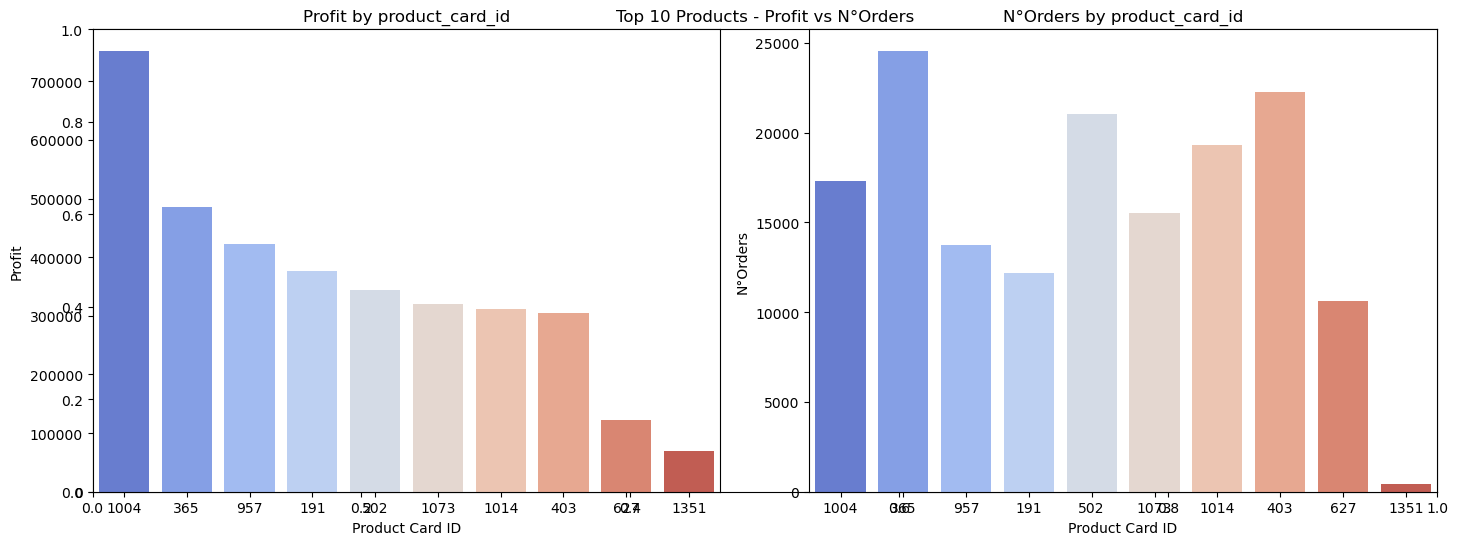

In [40]:
plt.figure(figsize=(15, 6))
plt.title("Top 10 Products - Profit vs N°Orders")

#BarPlot
plt.subplot(1, 2, 1)
sns.barplot(
    x='product_card_id',
    y="benefit_per_order",
    data=top10_product_profit,
    order=top10_product_card_id,    #ordena el gráfico en el órden de los indices que guarde en esta variable más arriba
    palette='coolwarm')
plt.xlabel("Product Card ID")
plt.ylabel("Profit")
plt.title("Profit by product_card_id")

#CountPlot
plt.subplot(1, 2, 2)
sns.countplot(
    x='product_card_id',
    data=top10_df,
    order=top10_product_card_id,    #ordena el gráfico en el órden de los indices que guarde en esta variable más arriba
    palette='coolwarm')
plt.xlabel("Product Card ID")
plt.ylabel("N°Orders")
plt.title("N°Orders by product_card_id")

plt.tight_layout()
plt.show()

The top-profit product is identified by Product ID 1004, which corresponds to "Field & Stream Sportsman 16 Gun Fire Safe"

## <h3>Histogram - Distribution of Sales</h3> 

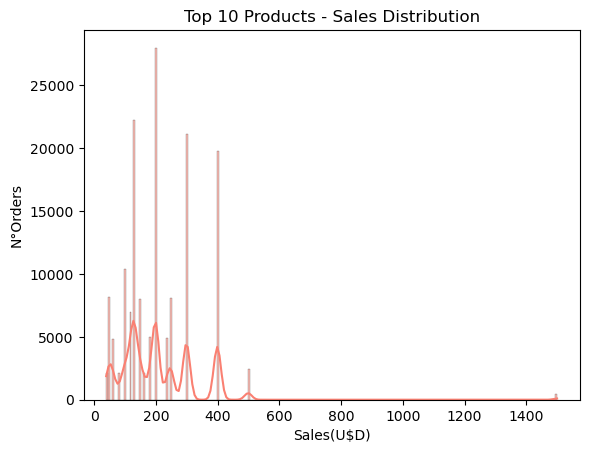

In [41]:
sns.histplot(data=top10_df, x='sales', 
             kde=True, color='salmon')

plt.xlabel("Sales(U$D)")
plt.ylabel("N°Orders")
plt.title("Top 10 Products - Sales Distribution")

plt.show()

## <h3>Histogram - Distribution of Product Price</h3> 

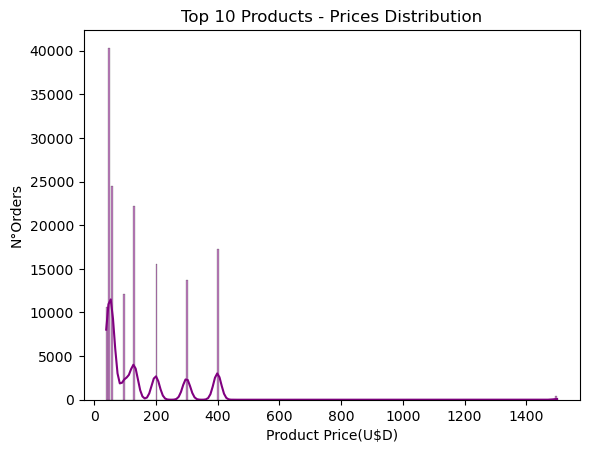

In [42]:
sns.histplot(data=top10_df, x='product_price', 
             kde=True, color='purple')

plt.xlabel("Product Price(U$D)")
plt.ylabel("N°Orders")
plt.title("Top 10 Products - Prices Distribution")

plt.show()

## <h3>CountPlot - Orders by Customer Country</h3>  

Text(0.5, 1.0, 'Top 10 Products - Orders by Customer Country')

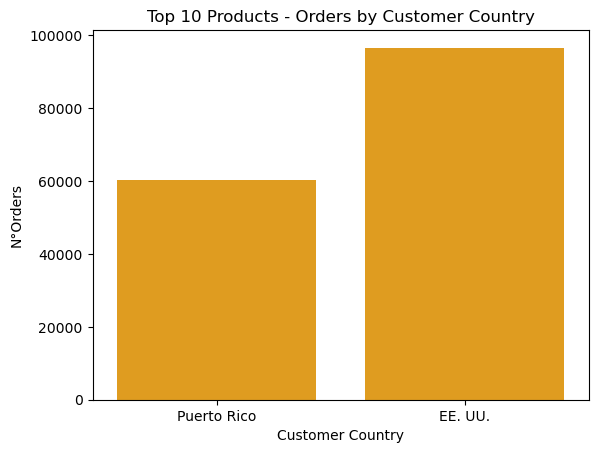

In [43]:
sns.countplot(data=top10_df, x="customer_country",
                color="orange")

plt.xlabel("Customer Country")
plt.ylabel("N°Orders")
plt.title("Top 10 Products - Orders by Customer Country")

## <h3>CountPlot - Orders by Payment Type</h3>  

Text(0.5, 1.0, 'Top 10 Products - Orders by Payment Type')

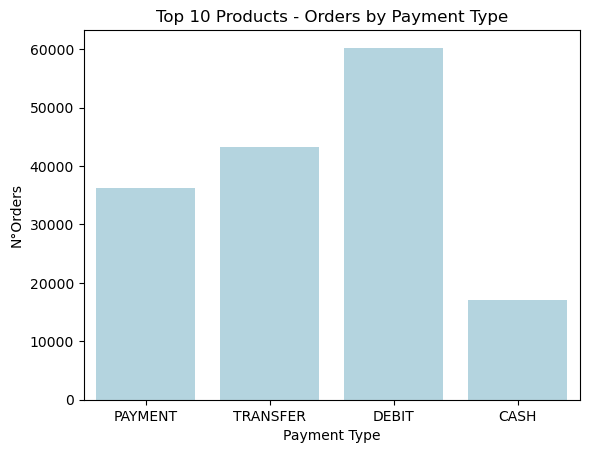

In [44]:
sns.countplot(data=top10_df, x="payment_type",
                color="lightblue")

plt.xlabel("Payment Type")
plt.ylabel("N°Orders")
plt.title("Top 10 Products - Orders by Payment Type")

## <h3>CountPlot - Orders by Shipping Mode</h3>  

Text(0.5, 1.0, 'Top 10 Products - Orders by Shipping Mode')

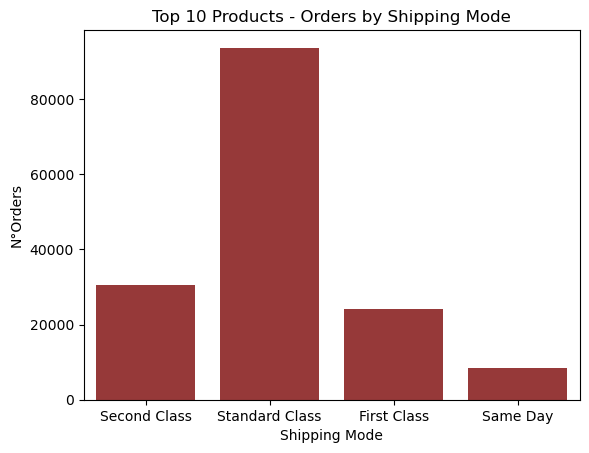

In [45]:
sns.countplot(data=top10_df, x="shipping_mode",
                color="brown")

plt.xlabel("Shipping Mode")
plt.ylabel("N°Orders")
plt.title("Top 10 Products - Orders by Shipping Mode")

## <h2 style="color: #608d67;">Bivariate Analysis (Top-10 "product_card_id")</h2>

## <h3>LinePlot - Sales Over the Time</h3>  

We need to understand the demand of the top-10 products over the time. 

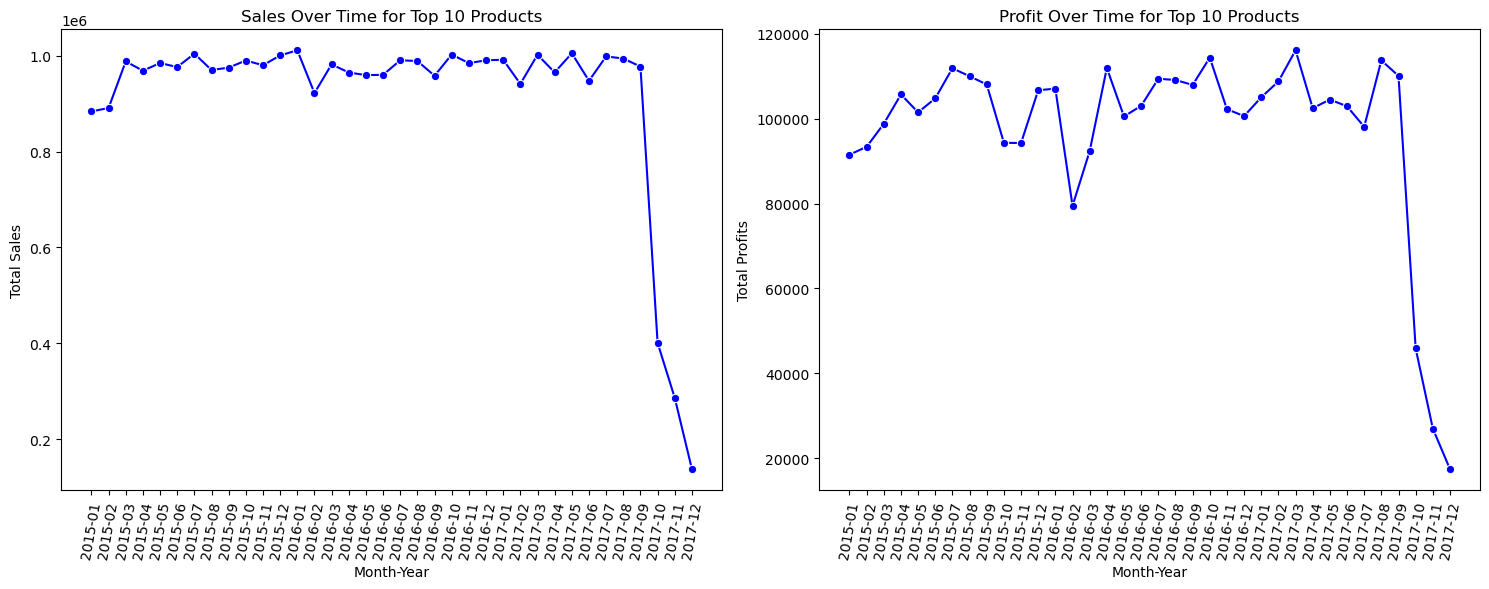

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una columna de frecuencia mensual (Año-Mes)
top10_df['month_year'] = top10_df['shipping_date_(dateorders)'].dt.to_period('M').astype(str)

# Filtrar los productos del top 10
filtered_data = top10_df[top10_df['product_card_id'].isin(top10_product_card_id)]

# Agrupar las ventas totales por mes
monthly_sales = filtered_data.groupby('month_year')['sales'].sum().round(2).reset_index()

#Agrupar los profit totales por mes
monthly_profit = filtered_data.groupby('month_year')['benefit_per_order'].sum().round(2).reset_index()


plt.figure(figsize=(15, 6))

# Lineplot Sales Over the Time
plt.subplot(1, 2, 1)
sns.lineplot(
    data=monthly_sales,
    x='month_year',   # Eje X: Mes y año
    y='sales',        # Eje Y: Ventas totales
    marker='o',       # Marcadores para cada punto
    color='blue'      # Color de la línea
)

plt.xticks(rotation=80)  # Rotar etiquetas del eje X
plt.xlabel("Month-Year")  # Etiqueta del eje X
plt.ylabel("Total Sales")  # Etiqueta del eje Y
plt.title("Sales Over Time for Top 10 Products")  # Título del gráfico
plt.tight_layout()  # Ajustar diseño para evitar solapamientos


# Lineplot Profit Over the Time
plt.subplot(1, 2, 2)
sns.lineplot(
    data=monthly_profit,
    x='month_year',   # Eje X: Mes y año
    y='benefit_per_order',    # Eje Y: Profit totales
    marker='o',       # Marcadores para cada punto
    color='blue'      # Color de la línea
)

plt.xticks(rotation=80)  # Rotar etiquetas del eje X
plt.xlabel("Month-Year")  # Etiqueta del eje X
plt.ylabel("Total Profits")  # Etiqueta del eje Y
plt.title("Profit Over Time for Top 10 Products")  # Título del gráfico
plt.tight_layout()  # Ajustar diseño para evitar solapamientos

plt.tight_layout()
plt.show()

In [47]:
top10_df.month_year.value_counts().tail()

month_year
2015-02    4354
2015-01    4251
2017-10     930
2017-11     191
2017-12      92
Name: count, dtype: int64

According to the lineplot, we noticed that the demand for the top-10 products by sales is quite stable along the time.\
However, it is true that at the end of 2017 the number of sales drop sharply.


## <h3>Features Classification</h3>  

For the Bivariate Analysis, it is neccesary to split the features into two categories: Categorical columns and Continuouns columns. We will take categorical features as continuous when the nunique values > 10.

First we have to convert the "month_year" column into DateTime 

In [48]:
top10_df['month_year'] = pd.to_datetime(top10_df['month_year']) #Convierto columna "month_year" a DateTime

In [49]:
#Defining classifications

categoricals = top10_df.select_dtypes(exclude="number")
numericals = top10_df.select_dtypes(include="number")

#Taking categorical features from the numerical features

cat_from_num = numericals.loc[:, numericals.nunique() < 10] # how does loc work Vs iloc
categoricals = pd.concat([categoricals, cat_from_num], axis=1)

numericals = numericals.drop(columns=cat_from_num.columns)
numericals = numericals.drop(columns= ["product_card_id","product_category_id"])

In [50]:
numericals

,benefit_per_order,sales,product_price,shipping_month,shipping_day
48,-30,119,59,2,29
49,-122,79,39,10,27
50,33,100,50,4,5
51,24,79,39,11,1
52,9,100,50,12,1
...,...,...,...,...,...
180514,40,399,399,1,20
180515,-613,399,399,1,19
180516,141,399,399,1,20
180517,186,399,399,1,18


In [51]:
categoricals

,payment_type,category_name,customer_country,customer_segment,market,product_name,shipping_date_(dateorders),shipping_mode,month_year,lead_time,late_delivery_risk,shipping_year,shipping_weekday
48,PAYMENT,Cleats,Puerto Rico,Home Office,Pacific Asia,Perfect Fitness Perfect Rip Deck,2016-02-29 13:57:00,Second Class,2016-02-01,2,1,2016,0
49,PAYMENT,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,Under Armour Girls' Toddler Spine Surge Runni,2016-10-27 14:39:00,Second Class,2016-10-01,2,0,2016,3
50,PAYMENT,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,Nike Men's Dri-FIT Victory Golf Polo,2016-04-05 04:37:00,Second Class,2016-04-01,2,1,2016,1
51,PAYMENT,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,Under Armour Girls' Toddler Spine Surge Runni,2016-11-01 01:31:00,Second Class,2016-11-01,2,0,2016,1
52,PAYMENT,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,Nike Men's Dri-FIT Victory Golf Polo,2016-12-01 01:18:00,Second Class,2016-12-01,2,1,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Fishing,EE. UU.,Home Office,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-20 03:40:00,Standard Class,2016-01-01,4,0,2016,2
180515,DEBIT,Fishing,EE. UU.,Corporate,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-19 01:34:00,Second Class,2016-01-01,2,1,2016,1
180516,TRANSFER,Fishing,EE. UU.,Corporate,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-20 21:00:00,Standard Class,2016-01-01,4,1,2016,2
180517,PAYMENT,Fishing,Puerto Rico,Consumer,Pacific Asia,Field & Stream Sportsman 16 Gun Fire Safe,2016-01-18 20:18:00,Standard Class,2016-01-01,4,0,2016,0


## <h3 style="color: #608d67;">Categorical vs Continuous</h3>  

## <h3>Sales by Payment Type</h3>  

We look to the distribution and outliers of the features under analysis

In [52]:
top10_df.payment_type.value_counts()

payment_type
DEBIT       60240
TRANSFER    43288
PAYMENT     36266
CASH        17082
Name: count, dtype: int64

In [53]:
sales_payment_type = top10_df.groupby("payment_type")["sales"].agg(["sum","mean","median","std"]).reset_index()
print(sales_payment_type)

  payment_type       sum   mean  median    std
0         CASH   3611870 211.44  199.00 131.90
1        DEBIT  12621913 209.53  199.00 129.91
2      PAYMENT   7617243 210.04  199.00 128.03
3     TRANSFER   9114485 210.55  199.00 128.84


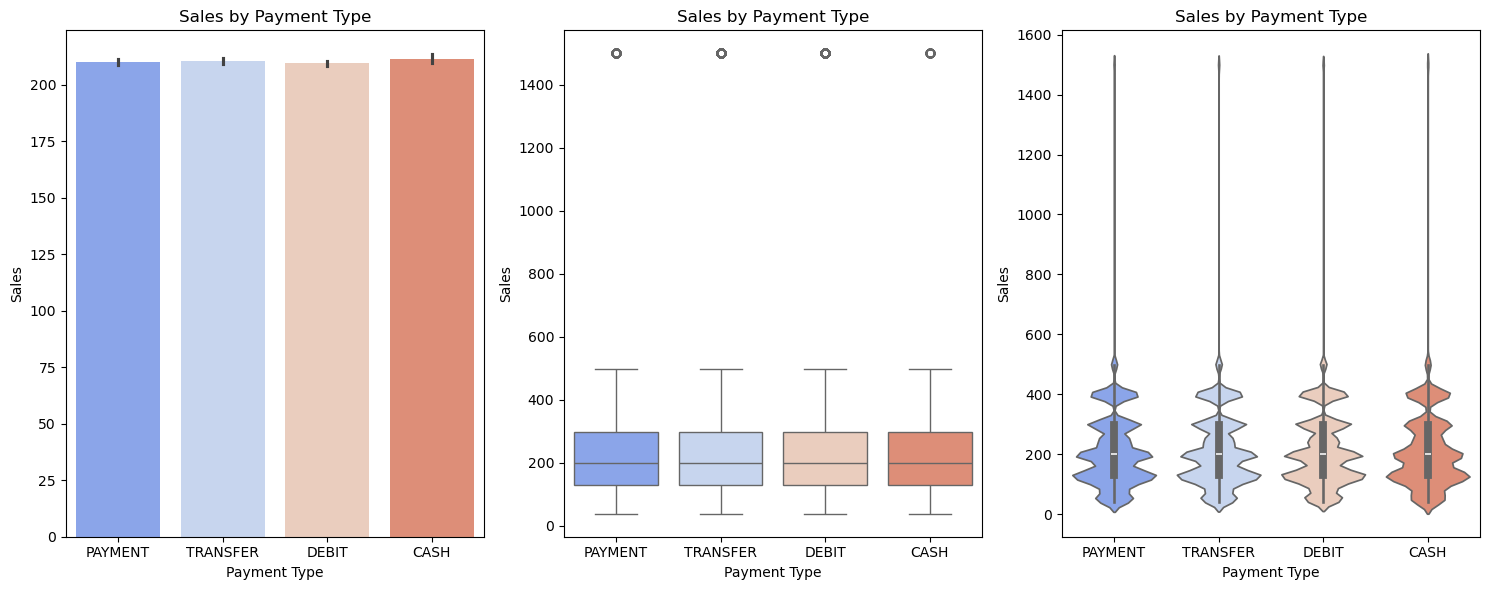

In [54]:
plt.figure(figsize=(15, 6))

#BarPlot
plt.subplot(1, 3, 1)
sns.barplot(data=top10_df, x="payment_type", y="sales", palette="coolwarm")
plt.title("Sales by Payment Type")
plt.ylabel("Sales")
plt.xlabel("Payment Type")

#BoxPlot
plt.subplot(1, 3, 2)
sns.boxplot(data=top10_df, x="payment_type", y="sales", palette="coolwarm")
plt.title("Sales by Payment Type")
plt.ylabel("Sales")
plt.xlabel("Payment Type")

#ViolinPlot
plt.subplot(1, 3, 3)
sns.violinplot(data=top10_df, x="payment_type", y="sales", palette="coolwarm")
plt.title("Sales by Payment Type")
plt.ylabel("Sales")
plt.xlabel("Payment Type")

plt.tight_layout()
plt.show()

## <h3>Sales by Category</h3>  

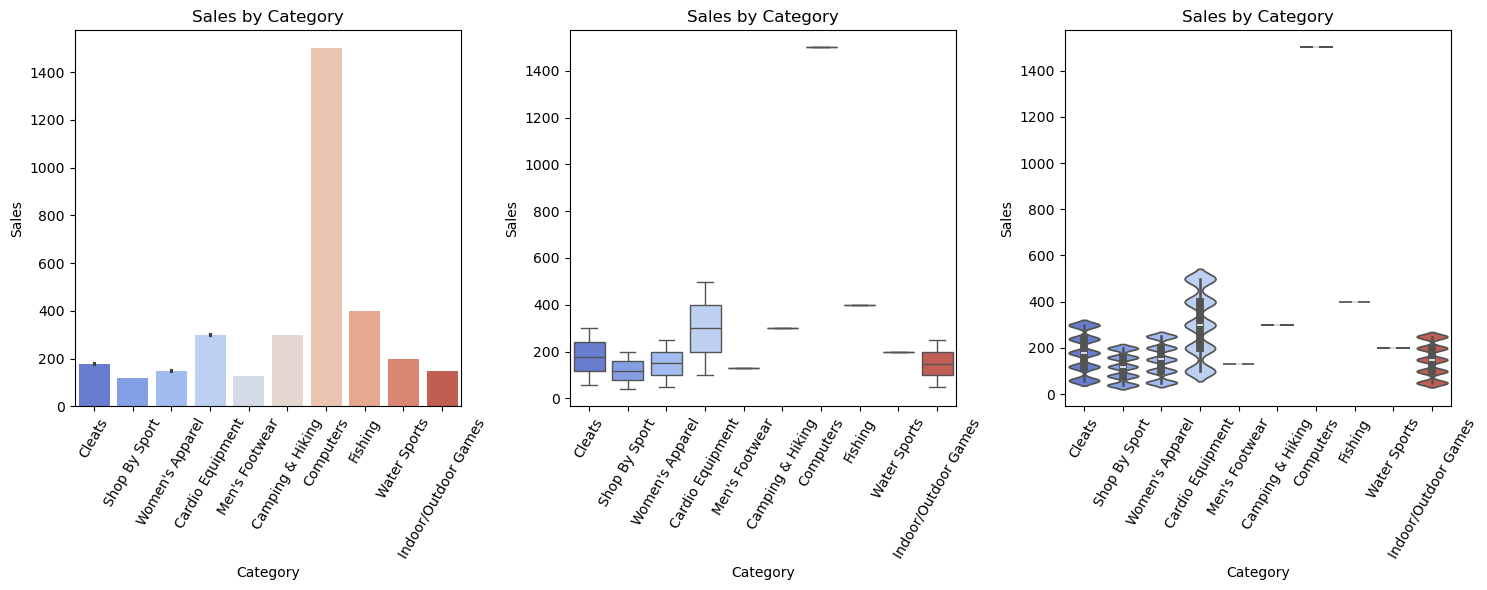

In [55]:
plt.figure(figsize=(15, 6))

#BarPlot
plt.subplot(1, 3, 1)
sns.barplot(data=top10_df, x="category_name", y="sales", palette="coolwarm")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.xticks(rotation=60)

#BoxPlot
plt.subplot(1, 3, 2)
sns.boxplot(data=top10_df, x="category_name", y="sales", palette="coolwarm")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.xticks(rotation=60)

#ViolinPlot
plt.subplot(1, 3, 3)
sns.violinplot(data=top10_df, x="category_name", y="sales", palette="coolwarm")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [56]:
sales_category = top10_df.groupby("category_name")["sales"].agg(["sum","mean","median","std","max","min"]).reset_index()
sales_category

,category_name,sum,mean,median,std,max,min
0,Camping & Hiking,4104971,299.00,299.00,0.00,299,299
1,Cardio Equipment,3655831,300.42,299.00,141.29,499,99
2,Cleats,4397365,179.37,179.00,84.65,299,59
3,Computers,663000,1500.00,1500.00,0.00,1500,1500
4,Fishing,6912675,399.00,399.00,0.00,399,399
5,Indoor/Outdoor Games,2870852,148.76,149.00,70.76,249,49
6,Men's Footwear,2869734,129.00,129.00,0.00,129,129
7,Shop By Sport,1258783,118.56,119.00,56.72,199,39
8,Water Sports,3084500,199.00,199.00,0.00,199,199
9,Women's Apparel,3147800,149.65,150.00,71.04,250,50


## <h3>Sales by Product</h3>  

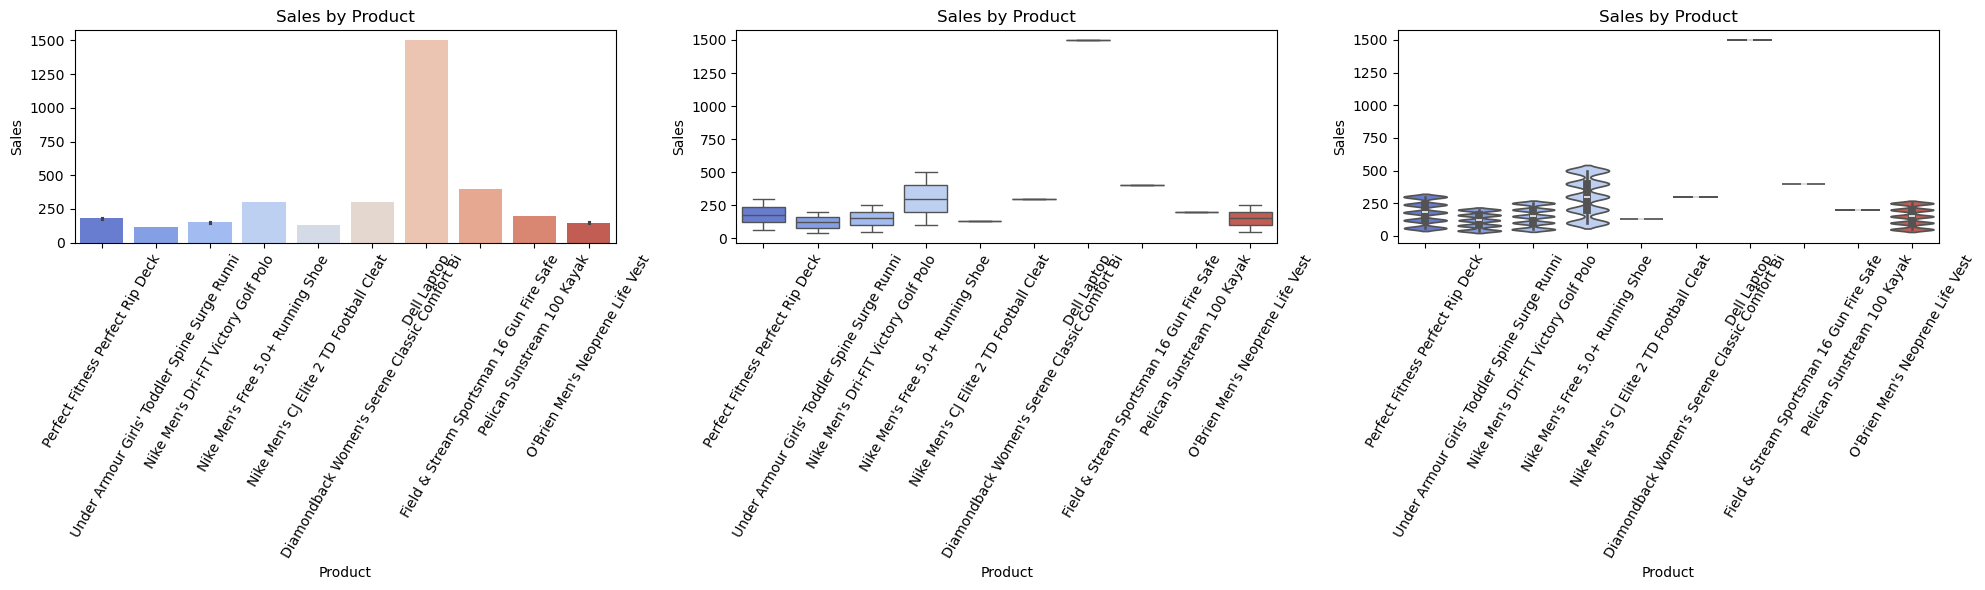

In [57]:
plt.figure(figsize=(20, 6))

#BarPlot
plt.subplot(1, 3, 1)
sns.barplot(data=top10_df, x="product_name", y="sales", palette="coolwarm")
plt.title("Sales by Product")
plt.ylabel("Sales")
plt.xlabel("Product")
plt.xticks(rotation=60)

#BoxPlot
plt.subplot(1, 3, 2)
sns.boxplot(data=top10_df, x="product_name", y="sales", palette="coolwarm")
plt.title("Sales by Product")
plt.ylabel("Sales")
plt.xlabel("Product")
plt.xticks(rotation=60)

#ViolinPlot
plt.subplot(1, 3, 3)
sns.violinplot(data=top10_df, x="product_name", y="sales", palette="coolwarm")
plt.title("Sales by Product")
plt.ylabel("Sales")
plt.xlabel("Product")
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

## <h3 style="color: #608d67;">Continuous vs Continuous</h3>  

## <h3>Analyzing Correlations</h3>  

Before starting this analysis we proceed to drop some columns from de DataSet that could hinder the effectiveness of the models in making predictions.

In [58]:
numericals

,benefit_per_order,sales,product_price,shipping_month,shipping_day
48,-30,119,59,2,29
49,-122,79,39,10,27
50,33,100,50,4,5
51,24,79,39,11,1
52,9,100,50,12,1
...,...,...,...,...,...
180514,40,399,399,1,20
180515,-613,399,399,1,19
180516,141,399,399,1,20
180517,186,399,399,1,18


In [59]:
correlations = numericals.corr()
correlations

,benefit_per_order,sales,product_price,shipping_month,shipping_day
benefit_per_order,1.00,0.13,0.10,0.01,0.00
sales,0.13,1.00,0.77,0.04,0.01
product_price,0.10,0.77,1.00,0.04,0.00
shipping_month,0.01,0.04,0.04,1.00,-0.01
shipping_day,0.00,0.01,0.00,-0.01,1.00


## <h3>Collinearity HeatMap</h3>  

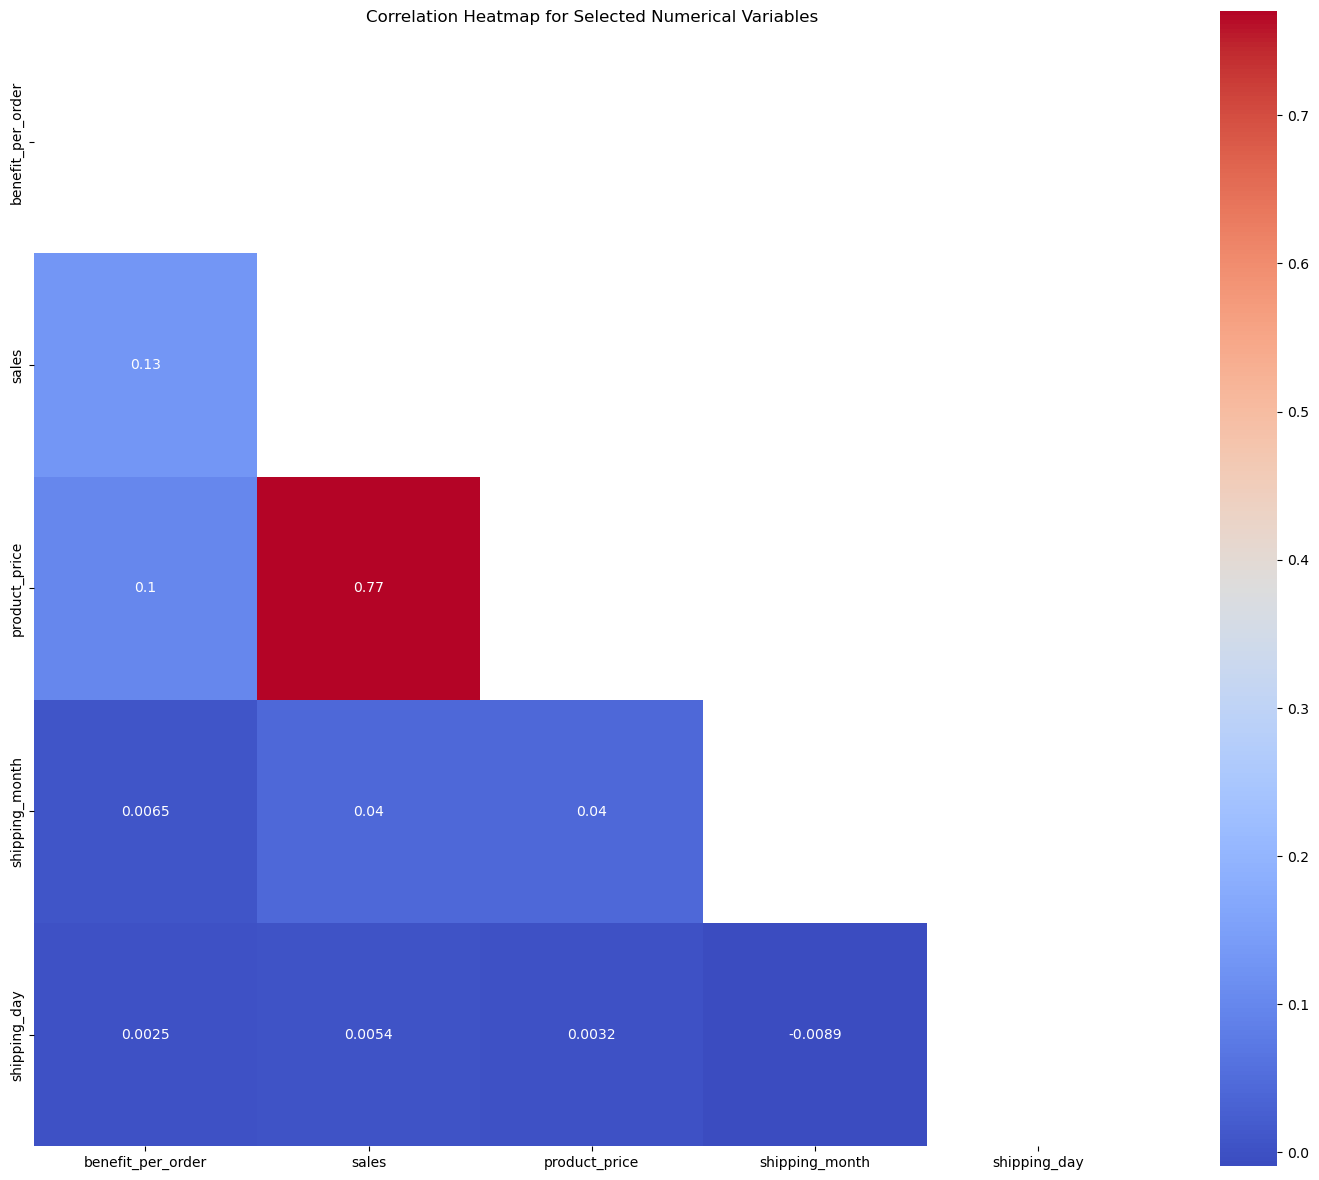

In [60]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Creating mask to get half matrix
mask = np.triu(np.ones_like(correlations, dtype=bool))

# Drawing HeatMap with half matrix
sns.heatmap(correlations, mask=mask, annot=True, cmap="coolwarm", square=True)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

## <h3>Distributions</h3>  

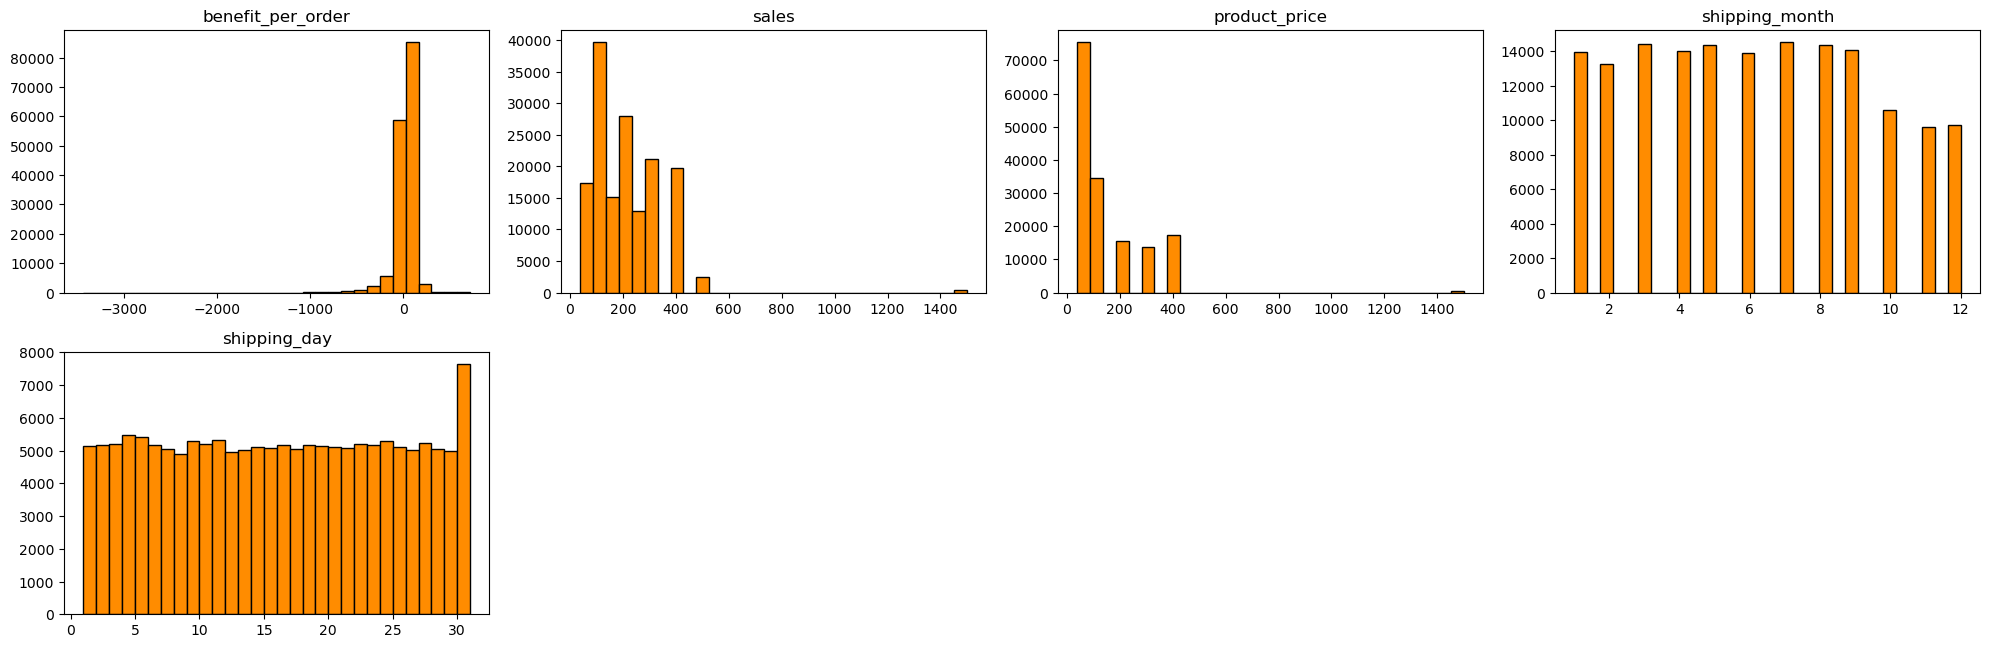

In [61]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(numericals.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(numericals.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(numericals.columns[i])

plt.tight_layout()
plt.show()

## <h3>Outliers</h3>  

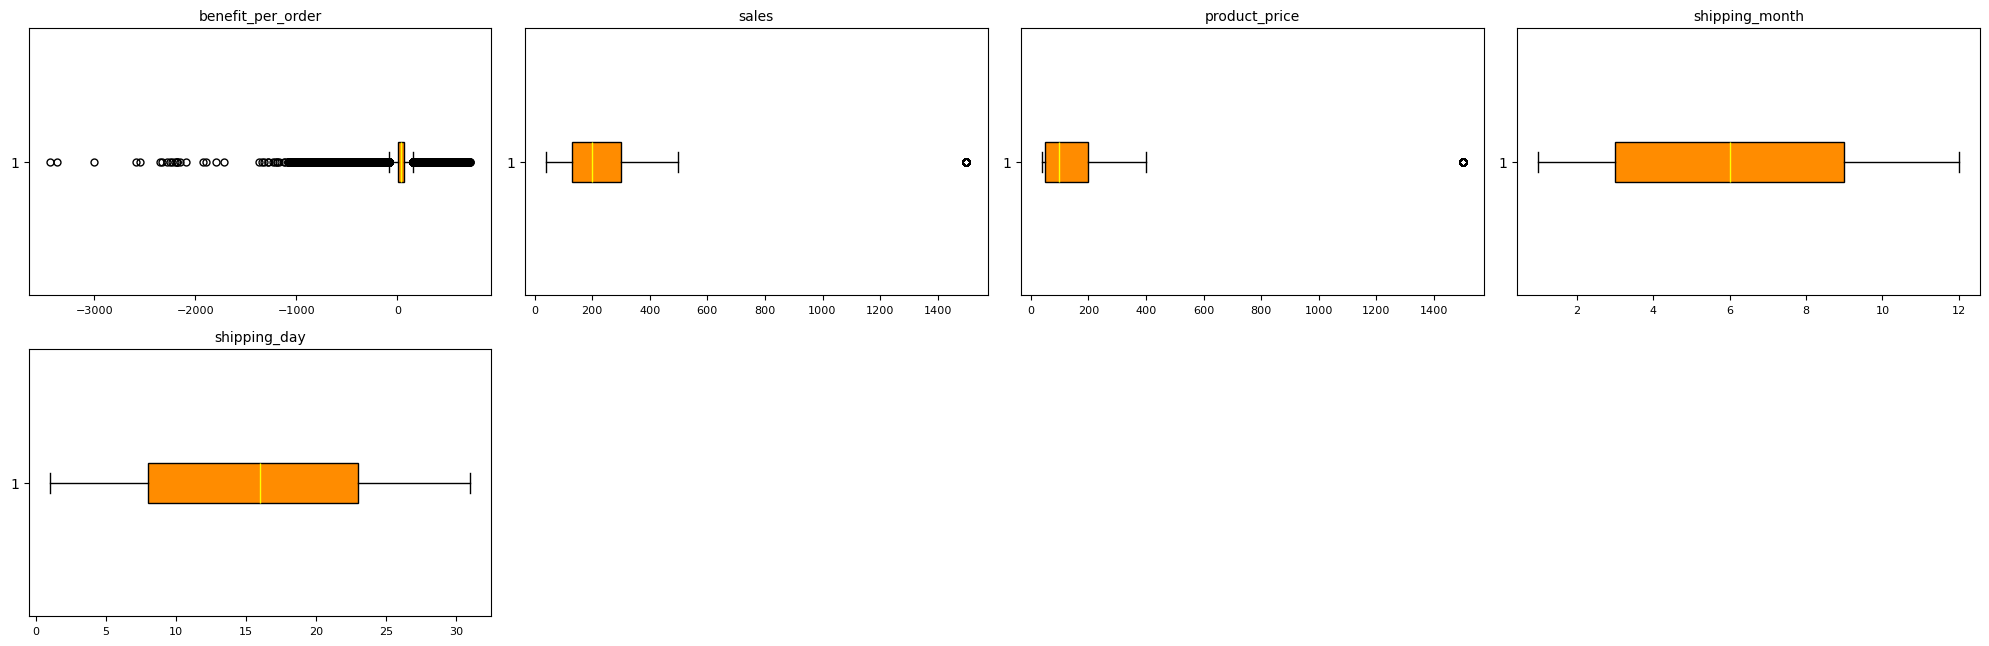

In [62]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(numericals.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(numericals.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(numericals.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

## <h3>Scatter Plots Sales vs Continuous Variables</h3>  

We will use a bucle "for" to make each pair of plots

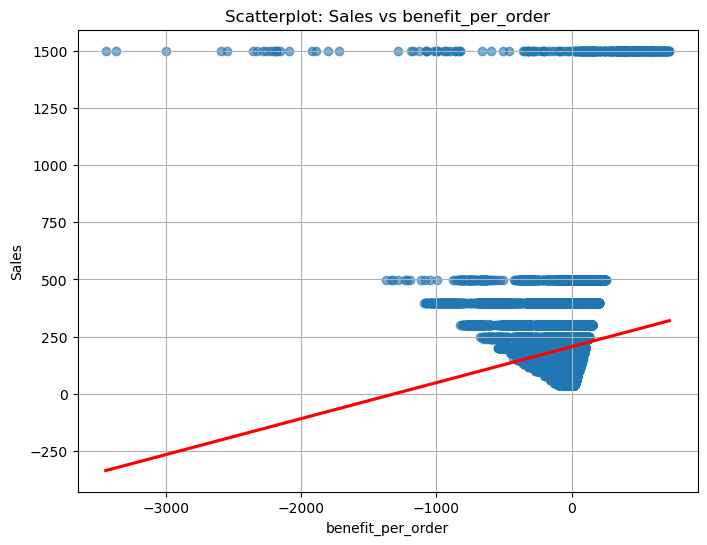

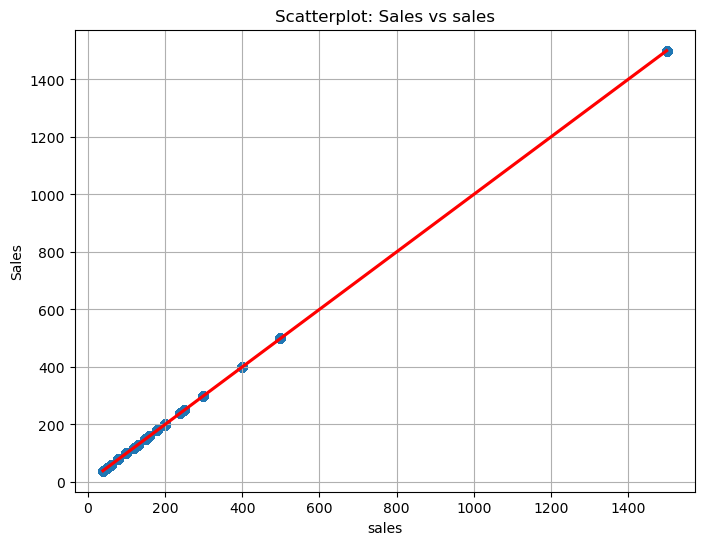

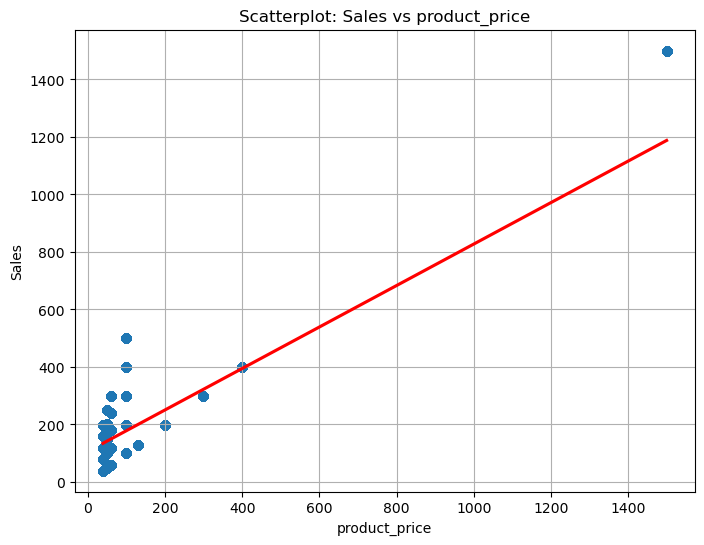

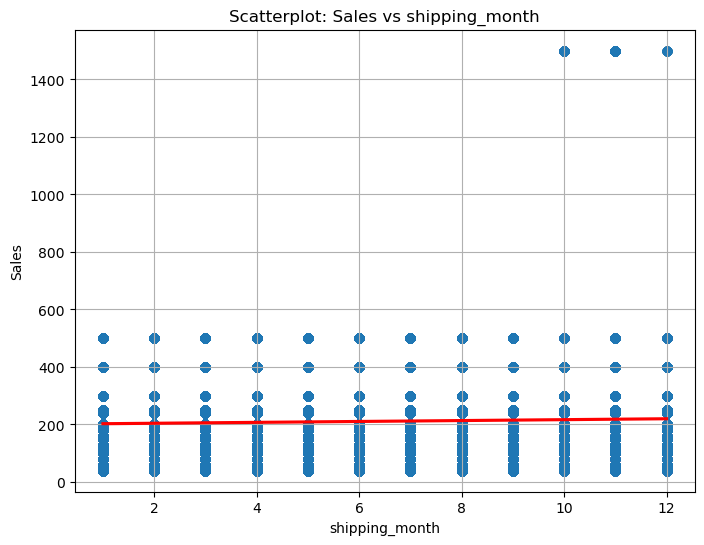

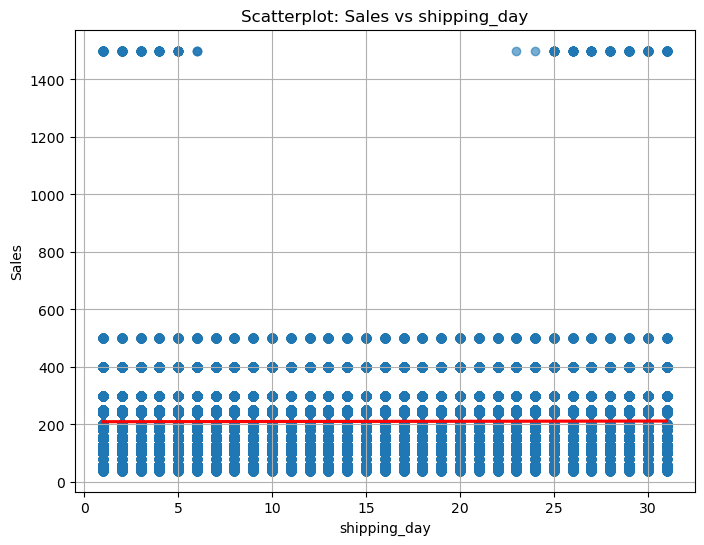

In [63]:
for col in numericals:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=top10_df, 
        x=col, 
        y='sales', 
        scatter_kws={'alpha': 0.6},  # Transparencia de puntos
        line_kws={'color': 'red'},  # Color de la línea
        ci=None  # Elimina el intervalo de confianza
    )
    plt.title(f'Scatterplot: Sales vs {col}')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.grid(True)
    plt.show()

## <h1 style="color: #52b45c;">Machine Learning</h1>

## <h3>Data Encoding</h3>  

We need to handle categorical data in order to serve it to the machine learning models with the right format.\
We will use "OneHotEncoding" from the "sklearn" library to convert the categorical values to numericals

We will focus on the product that generates the highest profit for the company (Product #1004) to predict its demand.

In [64]:
top10_df.head()

,payment_type,lead_time,benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday,month_year
48,PAYMENT,2,-30,1,Cleats,Puerto Rico,Home Office,Pacific Asia,119,365,17,Perfect Fitness Perfect Rip Deck,59,2016-02-29 13:57:00,Second Class,2016,2,29,0,2016-02-01
49,PAYMENT,2,-122,0,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,79,627,29,Under Armour Girls' Toddler Spine Surge Runni,39,2016-10-27 14:39:00,Second Class,2016,10,27,3,2016-10-01
50,PAYMENT,2,33,1,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,100,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,2016-04-05 04:37:00,Second Class,2016,4,5,1,2016-04-01
51,PAYMENT,2,24,0,Shop By Sport,Puerto Rico,Home Office,Pacific Asia,79,627,29,Under Armour Girls' Toddler Spine Surge Runni,39,2016-11-01 01:31:00,Second Class,2016,11,1,1,2016-11-01
52,PAYMENT,2,9,1,Women's Apparel,Puerto Rico,Home Office,Pacific Asia,100,502,24,Nike Men's Dri-FIT Victory Golf Polo,50,2016-12-01 01:18:00,Second Class,2016,12,1,3,2016-12-01


In [65]:
top1_df = top10_df[top10_df["product_card_id"]==1004]
top1_df

,payment_type,lead_time,benefit_per_order,late_delivery_risk,category_name,customer_country,customer_segment,market,sales,product_card_id,product_category_id,product_name,product_price,shipping_date_(dateorders),shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday,month_year
1358,PAYMENT,4,-44,0,Fishing,Puerto Rico,Home Office,Europe,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2015-06-19 11:51:00,Standard Class,2015,6,19,4,2015-06-01
1511,DEBIT,2,-679,1,Fishing,Puerto Rico,Consumer,Europe,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2015-10-10 14:40:00,Second Class,2015,10,10,5,2015-10-01
1512,DEBIT,2,199,0,Fishing,Puerto Rico,Consumer,Europe,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2015-08-20 21:55:00,Second Class,2015,8,20,3,2015-08-01
1515,DEBIT,2,0,0,Fishing,Puerto Rico,Consumer,Europe,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2015-06-16 05:22:00,Second Class,2015,6,16,1,2015-06-01
1519,DEBIT,2,-268,1,Fishing,Puerto Rico,Consumer,Europe,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2015-10-21 01:10:00,Second Class,2015,10,21,2,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,40,0,Fishing,EE. UU.,Home Office,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 03:40:00,Standard Class,2016,1,20,2,2016-01-01
180515,DEBIT,2,-613,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-19 01:34:00,Second Class,2016,1,19,1,2016-01-01
180516,TRANSFER,4,141,1,Fishing,EE. UU.,Corporate,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-20 21:00:00,Standard Class,2016,1,20,2,2016-01-01
180517,PAYMENT,4,186,0,Fishing,Puerto Rico,Consumer,Pacific Asia,399,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399,2016-01-18 20:18:00,Standard Class,2016,1,18,0,2016-01-01


We will drop some columns that don´t help to the prediction model for 1 type of product.

In [66]:
top1_df = top1_df.drop(columns=["category_name","product_card_id","product_category_id","product_name","shipping_date_(dateorders)","month_year","sales","product_price","benefit_per_order"])
top1_df

,payment_type,lead_time,late_delivery_risk,customer_country,customer_segment,market,shipping_mode,shipping_year,shipping_month,shipping_day,shipping_weekday
1358,PAYMENT,4,0,Puerto Rico,Home Office,Europe,Standard Class,2015,6,19,4
1511,DEBIT,2,1,Puerto Rico,Consumer,Europe,Second Class,2015,10,10,5
1512,DEBIT,2,0,Puerto Rico,Consumer,Europe,Second Class,2015,8,20,3
1515,DEBIT,2,0,Puerto Rico,Consumer,Europe,Second Class,2015,6,16,1
1519,DEBIT,2,1,Puerto Rico,Consumer,Europe,Second Class,2015,10,21,2
...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,0,EE. UU.,Home Office,Pacific Asia,Standard Class,2016,1,20,2
180515,DEBIT,2,1,EE. UU.,Corporate,Pacific Asia,Second Class,2016,1,19,1
180516,TRANSFER,4,1,EE. UU.,Corporate,Pacific Asia,Standard Class,2016,1,20,2
180517,PAYMENT,4,0,Puerto Rico,Consumer,Pacific Asia,Standard Class,2016,1,18,0


In [67]:
top1_df.nunique()

payment_type           4
lead_time              4
late_delivery_risk     2
customer_country       2
customer_segment       3
market                 5
shipping_mode          4
shipping_year          3
shipping_month        12
shipping_day          31
shipping_weekday       7
dtype: int64

Label Encoding

In [68]:
top1_with_dummies = pd.get_dummies(top1_df, columns=["payment_type","customer_country","customer_segment","market","shipping_mode"]).astype(int)
top1_with_dummies

,lead_time,late_delivery_risk,shipping_year,shipping_month,shipping_day,shipping_weekday,payment_type_CASH,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER,customer_country_EE. UU.,customer_country_Puerto Rico,customer_segment_Consumer,customer_segment_Corporate,customer_segment_Home Office,market_Africa,market_Europe,market_LATAM,market_Pacific Asia,market_USCA,shipping_mode_First Class,shipping_mode_Same Day,shipping_mode_Second Class,shipping_mode_Standard Class
1358,4,0,2015,6,19,4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1511,2,1,2015,10,10,5,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1512,2,0,2015,8,20,3,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1515,2,0,2015,6,16,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1519,2,1,2015,10,21,2,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,0,2016,1,20,2,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
180515,2,1,2016,1,19,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
180516,4,1,2016,1,20,2,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
180517,4,0,2016,1,18,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1


## <h3>Data Preprocessing</h3>  

In [69]:
X = top1_with_dummies.drop("lead_time", axis=1)
y = top1_with_dummies["lead_time"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
print(f'100% of our data: {len(top1_with_dummies)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 17325.
70% for training data: 12127.
30% for test data: 5198.


## <h3 style="color: #608d67;">Linear Regression</h3> 

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## <h3>Model Validation</h3>  

In [73]:
predictions = model.predict(X_test)

## <h3>Metrics</h3>  

In [74]:
r2_linear = r2_score(y_test, predictions)
RMSE_linear = mean_squared_error(y_test, predictions, squared=False)
MSE_linear = mean_squared_error(y_test, predictions)
MAE_linear = mean_absolute_error(y_test, predictions)

In [75]:
#Printing the results
print("R2 = ", round(r2_linear, 4))
print("RMSE = ", round(RMSE_linear, 4))
print("The value of the metric MSE is ", round(MSE_linear, 4))
print("MAE = ", round(MAE_linear, 4))

R2 =  1.0
RMSE =  0.0
The value of the metric MSE is  0.0
MAE =  0.0


## <h3 style="color: #608d67;">Ridge Regression</h3> 

In [76]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

## <h3>Model Validation</h3>  

In [77]:
predictions_ridge = ridge.predict(X_test)

## <h3>Metrics</h3>  

In [78]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

In [79]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  1.0
RMSE =  0.0007
The value of the metric MSE is  0.0
MAE =  0.0004


## <h3 style="color: #608d67;">Lasso Regression</h3> 

![image.png](attachment:6227c020-4890-4f08-824a-7e5920e5b8c3.png)

In [80]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

## <h3>Model Validation</h3>  

In [81]:
predictions_lasso = lasso.predict(X_test)

## <h3>Metrics</h3>  

In [82]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

In [83]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  -0.0001
RMSE =  1.3555
The value of the metric MSE is  1.8373
MAE =  1.2601


## <h3 style="color: #608d67;">Tree Regression</h3> 

![image.png](attachment:62cf3949-d3f1-4a92-bbdb-c8e85d9db29d.png)

In [84]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

## <h3>Model Validation</h3>  

In [85]:
predictions_tree = tree.predict(X_test)

## <h3>Metrics</h3>  

In [86]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

In [87]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  1.0
RMSE =  0.0
The value of the metric MSE is  0.0
MAE =  0.0


In [88]:
X_test

,late_delivery_risk,shipping_year,shipping_month,shipping_day,shipping_weekday,payment_type_CASH,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER,customer_country_EE. UU.,customer_country_Puerto Rico,customer_segment_Consumer,customer_segment_Corporate,customer_segment_Home Office,market_Africa,market_Europe,market_LATAM,market_Pacific Asia,market_USCA,shipping_mode_First Class,shipping_mode_Same Day,shipping_mode_Second Class,shipping_mode_Standard Class
137836,1,2017,5,9,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
146092,1,2016,12,14,2,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
137045,0,2017,6,23,4,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1
151016,1,2016,8,20,5,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1
151678,0,2016,7,9,5,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127354,0,2015,4,17,4,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
153811,0,2016,1,15,4,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
148650,1,2015,7,6,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
151760,1,2016,7,7,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1


In [89]:
print(1-(1-r2_tree)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1)))

1.0


## <h3 style="color: #608d67;">KNN Regression</h3> 

In [90]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

## <h3>Model Validation</h3>  

In [91]:
predictions_knn = knn.predict(X_test)

## <h3>Metrics</h3>  

In [92]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

In [93]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.5817
RMSE =  0.8766
The value of the metric MSE is  0.7684
MAE =  0.5324


## <h3 style="color: #608d67;">XGBoost Regression</h3> 

In [94]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

## <h3>Model Validation</h3>  

In [95]:
predictions_xgb = xgbr.predict(X_test)

In [96]:
X_test

,late_delivery_risk,shipping_year,shipping_month,shipping_day,shipping_weekday,payment_type_CASH,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER,customer_country_EE. UU.,customer_country_Puerto Rico,customer_segment_Consumer,customer_segment_Corporate,customer_segment_Home Office,market_Africa,market_Europe,market_LATAM,market_Pacific Asia,market_USCA,shipping_mode_First Class,shipping_mode_Same Day,shipping_mode_Second Class,shipping_mode_Standard Class
137836,1,2017,5,9,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
146092,1,2016,12,14,2,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
137045,0,2017,6,23,4,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1
151016,1,2016,8,20,5,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1
151678,0,2016,7,9,5,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127354,0,2015,4,17,4,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
153811,0,2016,1,15,4,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
148650,1,2015,7,6,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
151760,1,2016,7,7,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1


## <h3>Metrics</h3>  

In [97]:
r2_xgboost = r2_score(y_test, predictions_xgb)
RMSE_xgboost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgboost = mean_squared_error(y_test, predictions_xgb)
MAE_xgboost = mean_absolute_error(y_test, predictions_xgb)

In [98]:
#Printing the results
print("R2 = ", round(r2_xgboost, 4))
print("RMSE = ", round(RMSE_xgboost, 4))
print("The value of the metric MSE is ", round(MSE_xgboost, 4))
print("MAE = ", round(MAE_xgboost, 4))

R2 =  1.0
RMSE =  0.0
The value of the metric MSE is  0.0
MAE =  0.0


## <h3 style="color: #608d67;">FINAL COMPARISION</h3> 

In [99]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_linear, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgboost],
    'RMSE': [RMSE_linear, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgboost],
    'MSE': [MSE_linear, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgboost],
    'MAE': [MAE_linear, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgboost]
}

In [100]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,1.00,1.00,-0.00,1.00,0.58,1.00
RMSE,0.00,0.00,1.36,0.00,0.88,0.00
MSE,0.00,0.00,1.84,0.00,0.77,0.00
MAE,0.00,0.00,1.26,0.00,0.53,0.00


## <h3 style="color: #608d67;">Normalization with MinMaxScaler</h3> 

In [101]:
from sklearn.preprocessing import MinMaxScaler 

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [105]:
r2_xgb_mmscal = r2_score(y_test, predictions_xgb_2)
RMSE_xgb_mmscal = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xgb_mmscal = mean_squared_error(y_test, predictions_xgb_2)
MAE_xgb_mmscal = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xgb_mmscal, 4))
print("RMSE = ", round(RMSE_xgb_mmscal, 4))
print("The value of the metric MSE is ", round(MSE_xgb_mmscal, 4))
print("MAE = ", round(MAE_xgb_mmscal, 4))

R2 =  1.0
RMSE =  0.0
The value of the metric MSE is  0.0
MAE =  0.0
